## Observations and Insights 

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on='Mouse ID',  how='outer')

# # Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [204]:
# Checking the number of mice .
count_mice = combine_data["Mouse ID"].value_counts()
#count_mice
len(count_mice)

249

In [205]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combine_data = combine_data.fillna(0)
#duplicate_mouse_id = combine_data.duplicated(["Mouse ID", "Timepoint"])
test = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']), :]
Mouse_ID_duplicate = pd.unique(test['Mouse ID'])
Mouse_ID_duplicate

array(['g989'], dtype=object)

In [221]:
# Optional: Get all the data for the duplicate mouse ID. 


In [227]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = (combine_data.drop_duplicates(['Mouse ID', 'Timepoint'],keep=False)) 
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [228]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

combine_data_mean = combine_data.groupby(["Drug Regimen"]).mean()
combine_data_median = combine_data.groupby(["Drug Regimen"]).median()
combine_data_variance = combine_data.groupby(["Drug Regimen"]).var()
combine_data_standard_deviation = combine_data.groupby(["Drug Regimen"]).std()
combine_data_standard_SEM = combine_data.groupby(["Drug Regimen"]).sem()

summary_statistics_table = pd.concat([combine_data_mean["Tumor Volume (mm3)"], 
                                      combine_data_median["Tumor Volume (mm3)"], 
                                      combine_data_variance["Tumor Volume (mm3)"], 
                                      combine_data_standard_deviation["Tumor Volume (mm3)"], 
                                      combine_data_standard_SEM["Tumor Volume (mm3)"]], axis = 1)
#Print summary_statistics_table
summary_statistics_table


,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_Table_df = combine_data.groupby('Drug Regimen')
tumor_mean = summary_statistics_Table_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_statistics_Table_df['Tumor Volume (mm3)'].median()
tumor_var = summary_statistics_Table_df['Tumor Volume (mm3)'].var()
tumor_stdev = summary_statistics_Table_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_statistics_Table_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'mean': tumor_mean, 'median': tumor_median,
                                   'var': tumor_var,'std': tumor_stdev, 'sem': tumor_sem})

summary_grouped_df.head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

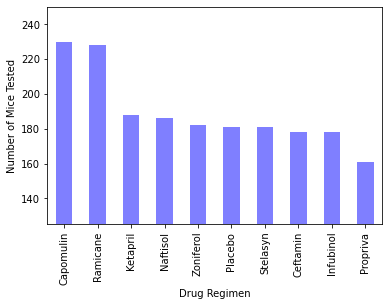

In [176]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Number of instances the "Drug Regimen" was used
combine_data_count = combine_data.groupby(["Drug Regimen"]).count()
#combine_data_count
#Dropping all column except "Mouse ID" 
dropped_combine_data_count = combine_data_count.drop(["Sex", 
                                                            "Age_months", 
                                                            "Weight (g)", 
                                                            "Timepoint", 
                                                            "Tumor Volume (mm3)", 
                                                            "Metastatic Sites"], axis = 1)

dropped_combine_data_count.sort_values('Mouse ID', ascending=False, inplace=True)

pymaceuticals_bar_plot = dropped_combine_data_count.plot(kind = "bar", 
                                                            legend = False, 
                                                            alpha = 0.5, 
                                                            color = "blue", 
                                                            width = 0.5, 
                                                            ylim = (125, 250), 
                                                            rot = 90)
# Axis labels
pymaceuticals_bar_plot.set_xlabel("Drug Regimen")
pymaceuticals_bar_plot.set_ylabel("Number of Mice Tested")


In [173]:
dropped_combine_data_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


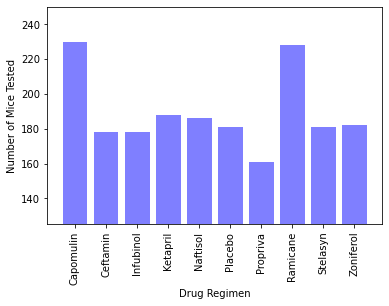

In [182]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Creating an array
mouse_id = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Creating a graph with the two lists 
plt.bar(x_axis, mouse_id, color = "blue", alpha = 0.5, align = "center", width = 0.8)
tick_locations = [value for value in x_axis]
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.xticks(tick_locations, drug_regimen, rotation = 90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.ylim((125, 250))
# Print
plt.show()

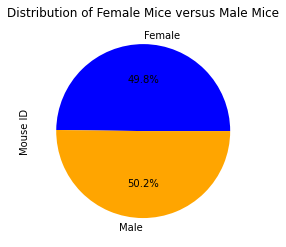

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# groupby the Sex and count the number of female and male mice
female_male_distribution = combine_data.groupby(["Sex"]).nunique()
# Delete the extra columns
del female_male_distribution["Drug Regimen"]
del female_male_distribution["Age_months"]
del female_male_distribution["Weight (g)"]
del female_male_distribution["Timepoint"]
del female_male_distribution["Tumor Volume (mm3)"]
del female_male_distribution["Metastatic Sites"]

pymaceuticals_pie_plot = female_male_distribution.plot.pie(y = "Mouse ID", 
                                                           autopct = '%1.1f%%', 
                                                           legend = False, 
                                                           title = "Distribution of Female Mice versus Male Mice", 
                                                           colors = ["blue", "orange"])


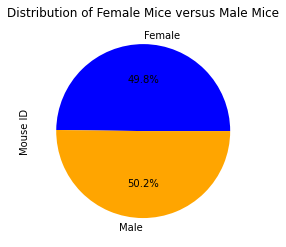

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
labels = ["Female", "Male"]
sizes = [124, 125]
colors = ["blue", "orange"]
# Creates the pie chart
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title("Distribution of Female Mice versus Male Mice")
plt.ylabel("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combine_data_copy = combine_data.copy()
#combine_data_copy
# Delete the unnecessary columns 
del combine_data_copy["Sex"]
del combine_data_copy["Age_months"]
del combine_data_copy["Weight (g)"]
del combine_data_copy["Metastatic Sites"]
#combine_data_copy

final_tumor_volume_df = combine_data_copy.groupby("Mouse ID").last().set_index("Drug Regimen")
#final_tumor_volume_df

del final_tumor_volume_df["Timepoint"]
#final_tumor_volume_df

# For instances of their final tumor volume
capomulin = final_tumor_volume_df.loc["Capomulin"]
ramicane = final_tumor_volume_df.loc["Ramicane"]
infubinol = final_tumor_volume_df.loc["Infubinol"]
ceftamin = final_tumor_volume_df.loc["Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capomulin
capomulin_min = capomulin.min()
capomulin_max = capomulin.max()
capomulin_quartiles = capomulin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
# Ramicane
ramicane_min = ramicane.min()
ramicane_max = ramicane.max()
ramicane_quartiles = ramicane["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
# Infubinol
infubinol_min = infubinol.min()
infubinol_max = infubinol.max()
infubinol_quartiles = infubinol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
# Ceftamin
ceftamin_min = ceftamin.min()
ceftamin_max = ceftamin.max()
ceftamin_quartiles = ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

In [188]:
print(f"The IQR for Capomulin is: {round(capomulin_iqr, 3)}")
print(f"The lower bound for Capomulin is {round(capomulin_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Capomulin is {round(capomulin_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Ramicane is: {round(ramicane_iqr, 3)}")
print(f"The lower bound for Ramicane is {round(ramicane_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Ramicane is {round(ramicane_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Infubinol is: {round(infubinol_iqr, 3)}")
print(f"The lower bound for Infubinol is {round(infubinol_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Infubinol is {round(infubinol_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Ceftamin is: {round(ceftamin_iqr, 3)}")
print(f"The lower bound for Ceftamin is {round(ceftamin_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Ceftamin is {round(ceftamin_upper_bound, 3)}; values above this may be outliers.")

The IQR for Capomulin is: 7.782
The lower bound for Capomulin is 20.705; values below this may be outliers.
The upper bound for Capomulin is 51.832; values above this may be outliers.

The IQR for Ramicane is: 9.099
The lower bound for Ramicane is 17.913; values below this may be outliers.
The upper bound for Ramicane is 54.307; values above this may be outliers.

The IQR for Infubinol is: 11.477
The lower bound for Infubinol is 36.833; values below this may be outliers.
The upper bound for Infubinol is 82.741; values above this may be outliers.

The IQR for Ceftamin is: 15.578
The lower bound for Ceftamin is 25.355; values below this may be outliers.
The upper bound for Ceftamin is 87.666; values above this may be outliers.


/var/folders/qh/44677dhj5kv978487x28nvmm0000gn/T/ipykernel_35342/4268525067.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9383ba17f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f936054b370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937050d8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9360562f70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9383ba53d0>,
 'means': []}

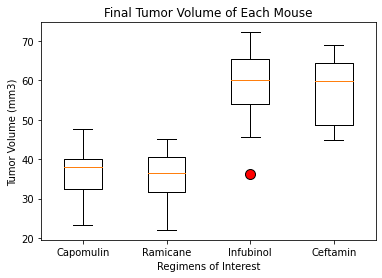

In [189]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Regimens of Interest")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
flierprops_capomulin = dict(marker = "o", markerfacecolor = "red", markersize = 10, markeredgecolor = "black")
# Combine our data into one variable to hold the four regimens of interest.
four_regimens = [capomulin["Tumor Volume (mm3)"], ramicane["Tumor Volume (mm3)"], 
                 infubinol["Tumor Volume (mm3)"], ceftamin["Tumor Volume (mm3)"]]
ax1.boxplot(four_regimens, flierprops = flierprops_capomulin)

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

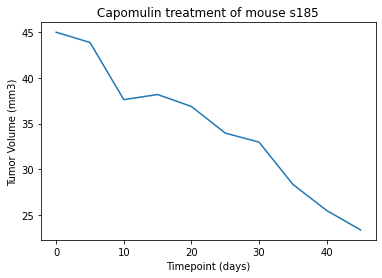

In [191]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = final_tumor_volume_df.loc["Capomulin", :]

# For mouse s185
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y_axis = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 
          33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")

Text(0, 0.5, 'Tumor Volume (mm3)')

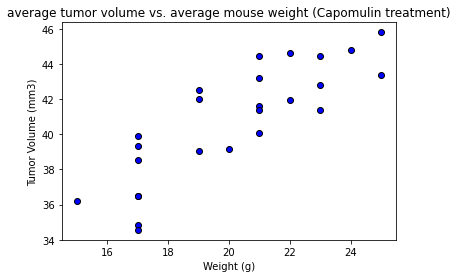

In [193]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
scatter_plot_df = combine_data.groupby(["Drug Regimen", "Mouse ID"]).mean().loc["Capomulin"]
# Delete the extra columns
del scatter_plot_df["Age_months"]
del scatter_plot_df["Timepoint"]
del scatter_plot_df["Metastatic Sites"]
mouse_weight = scatter_plot_df.reset_index().drop(columns = ["Mouse ID"]).loc[:, "Weight (g)"]
mouse_weight_list = mouse_weight.values.tolist()
tumor_volume = scatter_plot_df.reset_index().drop(columns = ["Mouse ID"]).loc[:, "Tumor Volume (mm3)"]
tumor_volume_list = tumor_volume.values.tolist()
plt.scatter(mouse_weight_list, tumor_volume_list, marker = "o", facecolors = "blue", edgecolors = "black")
# Create a title, x label, and y label 
plt.title("average tumor volume vs. average mouse weight (Capomulin treatment)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


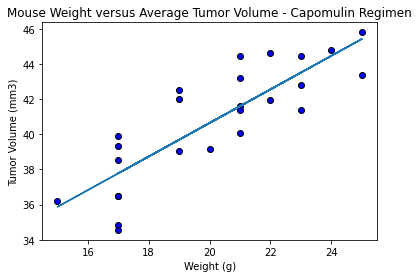

In [195]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(mouse_weight_list, tumor_volume_list, marker = "o", facecolors = "blue", edgecolors = "black")
# Create a title, x label, and y label for our chart.
plt.title("Mouse Weight versus Average Tumor Volume - Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Calculate the correlation coefficient and linear regression model
x = scatter_plot_df.loc[:, "Weight (g)"]
y = scatter_plot_df.loc[:, "Tumor Volume (mm3)"]
correlation_coefficient = st.pearsonr(x, y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}.")
# Plot the linear regression model on top of the previous scatter plot.
y_slope, y_int, y_r, y_p, y_std_err = st.linregress(x, y)
y_fit = y_slope * x + y_int
plt.plot(x,y_fit)

In [ ]:
# Final Analysis 
# Capomulin and Ramicane were used visibly more often than the rest of the treatment/drug regimens, as can be seen in the bar plot below In [7]. This may very well be because the Mean Tumor Volume for both of these were near 40 millimeters cubed, while the other eight regimens' Mean Tumor Volume hovered above 50 mm cubed. It was more successful, and I suppose that because of that, it warranted more uses.
# There were roughly (give or take two percentage points) the same number of female and male mice. This must have been purposely done, so as to not introduce a potentially confounding variable into Tumor Volume. Sex could have been a factor in this, but it was made a non-factor.
# For mouse s185, the tumor volume almost halved over the entire timepoint. This is for one mouse, but this must have been very promising to see.
# In order for us to say that there is a strong association or relationship between mouse weight and tumor volume, correlation typically has to be above 0.8. The correlation coefficient below is 0.84, which is above that threshold. This means that there is significant correlation between these two variables. It, of course, does not imply causation.